In [6]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

#### Uniform Sampling - @10

'precision': array([0.10312164]), 'recall': array([0.18612456]), 'ndcg': array([0.17414466])

In [23]:
with open('/home/ece/Desktop/Negative_Sampling/LightGCN-PyTorch/prediction_results.pkl', 'rb') as f:
    all_results_loaded = pickle.load(f)

In [24]:
#19 mini batch var, her batch de 100 user var, lastfm de 1892 user var == > sorun yok 
len(all_results_loaded[1][2])

100

In [25]:
df_ns = pd.DataFrame()

for element in all_results_loaded:
    user_ids, predicted_items, ground_truth = element
    for user_id, pred_items, gt_items in zip(user_ids, predicted_items, ground_truth):
        df_ns = df_ns.append({'user': user_id, 'pred_ns': pred_items, 'ground_truth': gt_items}, ignore_index=True)

/tmp/ipykernel_11675/4110971531.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ns = df_ns.append({'user': user_id, 'pred_ns': pred_items, 'ground_truth': gt_items}, ignore_index=True)
/tmp/ipykernel_11675/4110971531.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ns = df_ns.append({'user': user_id, 'pred_ns': pred_items, 'ground_truth': gt_items}, ignore_index=True)
/tmp/ipykernel_11675/4110971531.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ns = df_ns.append({'user': user_id, 'pred_ns': pred_items, 'ground_truth': gt_items}, ignore_index=True)
/tmp/ipykernel_11675/4110971531.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

In [26]:
df_ns

user                                            pred_ns  \
0     1319  [72, 3819, 1084, 4232, 3006, 1062, 1890, 4350,...   
1      730  [1618, 3870, 1772, 3528, 2606, 2034, 937, 3889...   
2     1781  [25, 4347, 1242, 3070, 407, 2461, 1866, 869, 1...   
3      415  [990, 397, 2861, 4091, 2389, 965, 3268, 2842, ...   
4      117  [2010, 2197, 4213, 2579, 2455, 537, 2380, 3547...   
...    ...                                                ...   
1853   592  [185, 2870, 615, 2445, 1839, 1884, 115, 1318, ...   
1854   998  [696, 2950, 1838, 3469, 4084, 1926, 2033, 2160...   
1855   935  [719, 1328, 429, 4303, 353, 1337, 1157, 3848, ...   
1856  1117  [196, 578, 928, 1763, 365, 1962, 1322, 76, 663...   
1857    21  [655, 3449, 1223, 4393, 1238, 2853, 3717, 3465...   

                                           ground_truth  
0          [120, 1502, 4457, 4403, 127, 371, 633, 3379]  
1     [1171, 926, 104, 624, 623, 3154, 208, 2994, 28...  
2     [444, 1187, 2156, 1519, 610, 2468, 3254, 3967,...  
3                                    [3445, 1745, 3359]  
4                                     [380, 1900, 1901]  
...                                                 ...  
1853                                        [175, 1790]  
1854                                             [4338]  
1855                                              [274]  
1856                                              [560]  
1857                                         [164, 574]  

[1858 rows x 3 columns]

In [27]:
# Get common items that showed in both model 1's and model 2's predictions
df_ns['common_items'] = df_ns.apply(lambda x: list(set(x['pred_ns']).intersection(x['ground_truth'])), axis=1)

In [28]:
#filtered_df = df_ns[df_ns['common_items'].apply(lambda x: len(x) >= 1)]
#filtered_df

In [29]:
df_ns['common_items'] = df_ns.apply(lambda x: list(set(x['pred_ns']).intersection(x['ground_truth'])), axis=1)

def common_len(row):
    return len(row['common_items'])

def not_in_pred(row):
    return [item for item in row['ground_truth'] if item not in row['pred_ns']]

def not_in_pred_len(row):
    return len(not_in_pred(row))

def not_in_gt(row):
    return [item for item in row['pred_ns'] if item not in row['ground_truth']]

def not_in_gt_len(row):
    return len(not_in_gt(row))

In [30]:
# Apply the common_len function to create the 'common_len' column
df_ns['common_len'] = df_ns.apply(lambda row: [common_len(row)], axis=1)
df_ns['gt_len'] = df_ns['ground_truth'].apply(lambda x: len(x))

# Divide the 'common_len' column by 10
df_ns['common_len/K'] = df_ns['common_len'].apply(lambda x: [element / 10 for element in x])

df_ns['not_in_pred'] = df_ns.apply(lambda row: not_in_pred(row), axis=1)
df_ns['not_in_pred_len'] = df_ns.apply(lambda row: [not_in_pred_len(row)], axis=1)

df_ns['not_in_pred_len/K'] = df_ns['not_in_pred_len'].apply(lambda x: [element / 10 for element in x])

df_ns['not_in_gt'] = df_ns.apply(lambda row: not_in_gt(row), axis=1)
df_ns['not_in_gt_len'] = df_ns.apply(lambda row: [not_in_gt_len(row)], axis=1)

df_ns['not_in_gt_len/K'] = df_ns['not_in_gt_len'].apply(lambda x: [element / 10 for element in x])

In [31]:
df_ns['common_len'] = df_ns['common_len'].apply(lambda x: x[0])
df_ns['common_len/K'] = df_ns['common_len/K'].apply(lambda x: x[0])
df_ns['not_in_pred_len'] = df_ns['not_in_pred_len'].apply(lambda x: x[0])
df_ns['not_in_pred_len/K'] = df_ns['not_in_pred_len/K'].apply(lambda x: x[0])
df_ns['not_in_gt_len'] = df_ns['not_in_gt_len'].apply(lambda x: x[0])
df_ns['not_in_gt_len/K'] = df_ns['not_in_gt_len/K'].apply(lambda x: x[0])

In [32]:
df_ns['not_in_pred/GT'] = df_ns['not_in_pred_len']/df_ns['gt_len']
df_ns['common_len/GT'] = df_ns['common_len'] / df_ns['gt_len']

In [33]:
df_ns.columns

Index(['user', 'pred_ns', 'ground_truth', 'common_items', 'common_len',
       'gt_len', 'common_len/K', 'not_in_pred', 'not_in_pred_len',
       'not_in_pred_len/K', 'not_in_gt', 'not_in_gt_len', 'not_in_gt_len/K',
       'not_in_pred/GT', 'common_len/GT'],
      dtype='object')

In [45]:
df_ns.loc[df_ns['common_len'] > 0].shape

(23, 15)

In [46]:
df_no_ns.loc[df_no_ns['common_len'] > 0].shape

(1156, 15)

In [14]:
users_to_analyze1_ns = df_ns.nsmallest(10, 'common_len/GT')[['user', 'common_len/GT']]
# common item cogunlukla sifir oldugu icin coomon_len/GT de cogunlukla sifir. -- Analiz edilecek cok kisi var 
users_to_analyze2_ns = df_ns.nsmallest(10, 'not_in_pred/GT')[['user', 'not_in_pred/GT']]

users_to_analyze3_ns = df_ns.nsmallest(10, 'not_in_gt_len/K')[['user', 'not_in_gt_len/K']]


In [15]:
df_ns.to_csv('uniform_1_1_analyze.csv', index=False)

- common len != 0 olanlari incele
- not in pred -> gt de olup pred de olamayan = pred'in yakalayamadigi item'lar --> her kisi icin yakalayamadigi item var mi? bu item'lari incele ! 
- not in gt -> pred de olup gt de olmayanlar = yanlis tahminler --> her kisi icin ortak yanlis tahmin edilen var mi? Varsa bu item'lari incele !

- --- Incelemek ??? 
    - degree / closeness / betweenless centrality
    - node redunduncy
    - incelenen item'in komsulari kimler (hangi user'lar almis? satin alan user'lar bask hangi item'lari almis??)   


In [16]:
df_ns.columns

Index(['user', 'pred_ns', 'ground_truth', 'common_items', 'common_len',
       'gt_len', 'common_len/K', 'not_in_pred', 'not_in_pred_len',
       'not_in_pred_len/K', 'not_in_gt', 'not_in_gt_len', 'not_in_gt_len/K',
       'not_in_pred/GT', 'common_len/GT'],
      dtype='object')

In [17]:
# En cok gorunen yakalanamayan item'lar (not in pred)

freq_dict_fn = Counter(item for sublist in df_ns['not_in_pred'] for item in sublist)
sorted_freq_dict_fn = dict(sorted(freq_dict_fn.items(), key=lambda x: x[1], reverse=True))

In [18]:
# en cok gorunen ve yanlis detect edilen itemlar (not in gt)
freq_dict_fp = Counter(item for sublist in df_ns['not_in_gt'] for item in sublist)
sorted_freq_dict_fp = dict(sorted(freq_dict_fp.items(), key=lambda x: x[1], reverse=True))

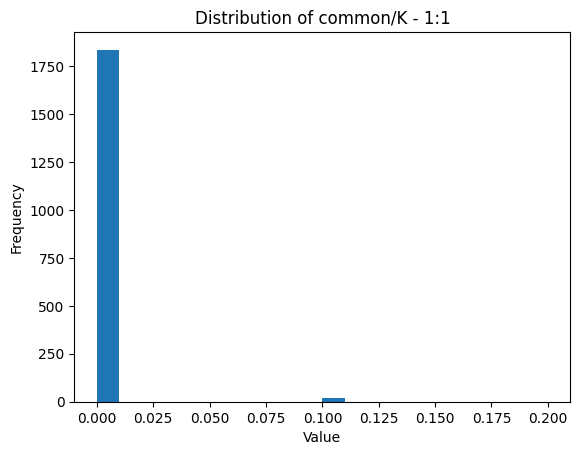

In [28]:
# Plot a histogram of the values in the column
plt.hist(df_ns['common_len/K'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of common/K - 1:1')
plt.show()

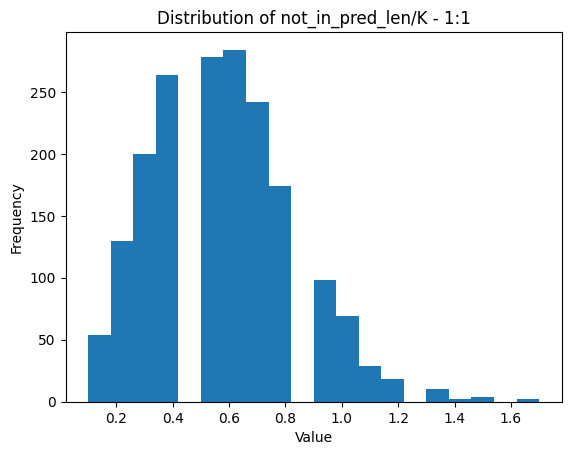

In [29]:
# Plot a histogram of the values in the column
plt.hist(df_ns['not_in_pred_len/K'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of not_in_pred_len/K - 1:1')
plt.show()

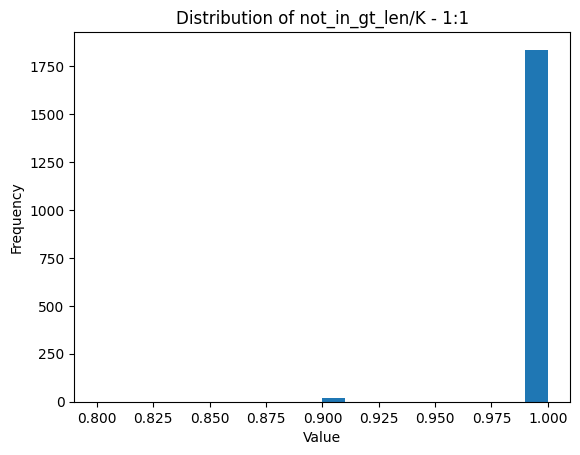

In [30]:
# Plot a histogram of the values in the column
plt.hist(df_ns['not_in_gt_len/K'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of not_in_gt_len/K - 1:1')
plt.show()

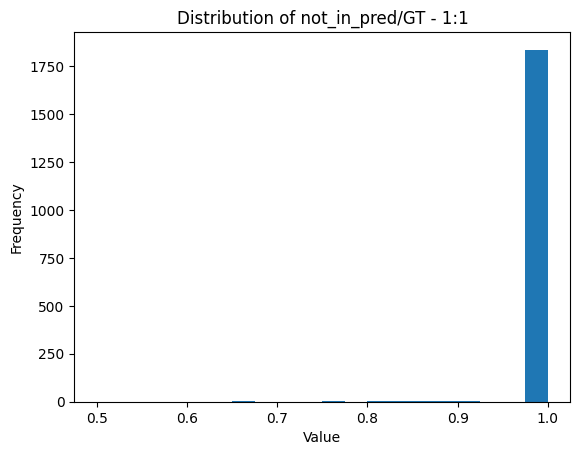

In [17]:
# Plot a histogram of the values in the column
plt.hist(df_ns['not_in_pred/GT'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of not_in_pred/GT - 1:1')
plt.show()

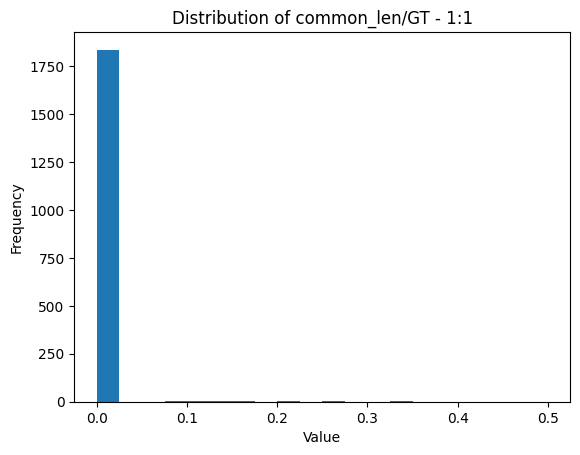

In [18]:
# Plot a histogram of the values in the column
plt.hist(df_ns['common_len/GT'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of common_len/GT - 1:1')
plt.show()

#### Without Sampling

'precision': array([0.0744887]), 'recall': array([0.26546899]), 'ndcg': array([0.20644541]

In [7]:
with open('/home/ece/Desktop/Negative_Sampling/no_ns_prediction_results.pkl', 'rb') as f:
    no_sampling = pickle.load(f)

In [8]:
df_no_ns = pd.DataFrame()

for element in no_sampling:
    user_ids, predicted_items, ground_truth = element
    for user_id, pred_items, gt_items in zip(user_ids, predicted_items, ground_truth):
        df_no_ns = df_no_ns.append({'user': user_id, 'pred_no_ns': pred_items, 'ground_truth': gt_items}, ignore_index=True)

/tmp/ipykernel_11675/990378808.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_no_ns = df_no_ns.append({'user': user_id, 'pred_no_ns': pred_items, 'ground_truth': gt_items}, ignore_index=True)
/tmp/ipykernel_11675/990378808.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_no_ns = df_no_ns.append({'user': user_id, 'pred_no_ns': pred_items, 'ground_truth': gt_items}, ignore_index=True)
/tmp/ipykernel_11675/990378808.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_no_ns = df_no_ns.append({'user': user_id, 'pred_no_ns': pred_items, 'ground_truth': gt_items}, ignore_index=True)
/tmp/ipykernel_11675/990378808.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

In [9]:
df_no_ns

user                                         pred_no_ns  \
0     1319  [1489, 617, 770, 553, 245, 544, 3493, 1156, 41...   
1      730  [299, 1170, 1171, 101, 482, 1436, 251, 1669, 2...   
2     1781  [1522, 444, 610, 1187, 894, 1787, 2468, 1009, ...   
3      415  [2536, 1360, 813, 2938, 2357, 1764, 3359, 3358...   
4      117  [735, 364, 545, 3807, 1596, 350, 927, 3051, 73...   
...    ...                                                ...   
1853   592  [176, 966, 181, 218, 185, 581, 587, 335, 1629,...   
1854   998  [4338, 4419, 1969, 1967, 136, 1971, 2776, 342,...   
1855   935  [784, 783, 307, 684, 482, 680, 677, 1231, 512,...   
1856  1117  [52, 49, 90, 106, 437, 86, 44, 690, 649, 701, ...   
1857    21  [65, 336, 2690, 41, 168, 1344, 1921, 1645, 249...   

                                           ground_truth  
0          [120, 1502, 4457, 4403, 127, 371, 633, 3379]  
1     [1171, 926, 104, 624, 623, 3154, 208, 2994, 28...  
2     [444, 1187, 2156, 1519, 610, 2468, 3254, 3967,...  
3                                    [3445, 1745, 3359]  
4                                     [380, 1900, 1901]  
...                                                 ...  
1853                                        [175, 1790]  
1854                                             [4338]  
1855                                              [274]  
1856                                              [560]  
1857                                         [164, 574]  

[1858 rows x 3 columns]

In [10]:
def delete_last_two(lst):
    return lst[:-10]

# Apply the function to the pred_no_ns column
df_no_ns['pred_no_ns'] = df_no_ns['pred_no_ns'].apply(delete_last_two)

In [11]:
def common_len(row):
    return len(row['common_items'])

def not_in_pred(row):
    return [item for item in row['ground_truth'] if item not in row['pred_no_ns']]

def not_in_pred_len(row):
    return len(not_in_pred(row))

def not_in_gt(row):
    return [item for item in row['pred_no_ns'] if item not in row['ground_truth']]

def not_in_gt_len(row):
    return len(not_in_gt(row))

In [12]:
df_no_ns['common_items'] = df_no_ns.apply(lambda x: list(set(x['pred_no_ns']).intersection(x['ground_truth'])), axis=1)
df_no_ns['common_len'] = df_no_ns.apply(lambda row: [common_len(row)], axis=1)
df_no_ns['gt_len'] = df_no_ns['ground_truth'].apply(lambda x: len(x))

# Divide the 'common_len' column by 10
df_no_ns['common_len/K'] = df_no_ns['common_len'].apply(lambda x: [element / 10 for element in x])

df_no_ns['not_in_pred'] = df_no_ns.apply(lambda row: not_in_pred(row), axis=1)
df_no_ns['not_in_pred_len'] = df_no_ns.apply(lambda row: [not_in_pred_len(row)], axis=1)
df_no_ns['not_in_pred_len/K'] = df_no_ns['not_in_pred_len'].apply(lambda x: [element / 10 for element in x])

df_no_ns['not_in_gt'] = df_no_ns.apply(lambda row: not_in_gt(row), axis=1)
df_no_ns['not_in_gt_len'] = df_no_ns.apply(lambda row: [not_in_gt_len(row)], axis=1)
df_no_ns['not_in_gt_len/K'] = df_no_ns['not_in_gt_len'].apply(lambda x: [element / 10 for element in x])

In [13]:
df_no_ns['common_len'] = df_no_ns['common_len'].apply(lambda x: x[0])
df_no_ns['common_len/K'] = df_no_ns['common_len/K'].apply(lambda x: x[0])
df_no_ns['not_in_pred_len'] = df_no_ns['not_in_pred_len'].apply(lambda x: x[0])
df_no_ns['not_in_pred_len/K'] = df_no_ns['not_in_pred_len/K'].apply(lambda x: x[0])
df_no_ns['not_in_gt_len'] = df_no_ns['not_in_gt_len'].apply(lambda x: x[0])
df_no_ns['not_in_gt_len/K'] = df_no_ns['not_in_gt_len/K'].apply(lambda x: x[0])

In [14]:
df_no_ns['not_in_pred/GT'] = df_no_ns['not_in_pred_len']/df_no_ns['gt_len']
df_no_ns['common_len/GT'] = df_no_ns['common_len'] / df_no_ns['gt_len']

In [15]:
df_no_ns

user                                         pred_no_ns  \
0     1319  [1489, 617, 770, 553, 245, 544, 3493, 1156, 41...   
1      730  [299, 1170, 1171, 101, 482, 1436, 251, 1669, 2...   
2     1781  [1522, 444, 610, 1187, 894, 1787, 2468, 1009, ...   
3      415  [2536, 1360, 813, 2938, 2357, 1764, 3359, 3358...   
4      117  [735, 364, 545, 3807, 1596, 350, 927, 3051, 73...   
...    ...                                                ...   
1853   592  [176, 966, 181, 218, 185, 581, 587, 335, 1629,...   
1854   998  [4338, 4419, 1969, 1967, 136, 1971, 2776, 342,...   
1855   935  [784, 783, 307, 684, 482, 680, 677, 1231, 512,...   
1856  1117      [52, 49, 90, 106, 437, 86, 44, 690, 649, 701]   
1857    21  [65, 336, 2690, 41, 168, 1344, 1921, 1645, 249...   

                                           ground_truth  \
0          [120, 1502, 4457, 4403, 127, 371, 633, 3379]   
1     [1171, 926, 104, 624, 623, 3154, 208, 2994, 28...   
2     [444, 1187, 2156, 1519, 610, 2468, 3254, 3967,...   
3                                    [3445, 1745, 3359]   
4                                     [380, 1900, 1901]   
...                                                 ...   
1853                                        [175, 1790]   
1854                                             [4338]   
1855                                              [274]   
1856                                              [560]   
1857                                         [164, 574]   

                            common_items  common_len  gt_len  common_len/K  \
0                                     []           0       8           0.0   
1                                 [1171]           1      10           0.1   
2     [610, 1187, 2468, 1519, 1522, 444]           6      10           0.6   
3                                 [3359]           1       3           0.1   
4                                     []           0       3           0.0   
...                                  ...         ...     ...           ...   
1853                                  []           0       2           0.0   
1854                              [4338]           1       1           0.1   
1855                                  []           0       1           0.0   
1856                                  []           0       1           0.0   
1857                                  []           0       2           0.0   

                                            not_in_pred  not_in_pred_len  \
0          [120, 1502, 4457, 4403, 127, 371, 633, 3379]                8   
1     [926, 104, 624, 623, 3154, 208, 2994, 2802, 1030]                9   
2                               [2156, 3254, 3967, 540]                4   
3                                          [3445, 1745]                2   
4                                     [380, 1900, 1901]                3   
...                                                 ...              ...   
1853                                        [175, 1790]                2   
1854                                                 []                0   
1855                                              [274]                1   
1856                                              [560]                1   
1857                                         [164, 574]                2   

      not_in_pred_len/K                                          not_in_gt  \
0                   0.8  [1489, 617, 770, 553, 245, 544, 3493, 1156, 41...   
1                   0.9   [299, 1170, 101, 482, 1436, 251, 1669, 276, 112]   
2                   0.4                            [894, 1787, 1009, 3938]   
3                   0.2  [2536, 1360, 813, 2938, 2357, 1764, 3358, 4013...   
4                   0.3  [735, 364, 545, 3807, 1596, 350, 927, 3051, 73...   
...                 ...                                                ...   
1853                0.2  [176, 966, 181, 218, 185, 581, 587, 335, 1629,...   
1854                0.0  [4419, 1969, 1967

In [16]:
users_to_analyze1_no_ns = df_no_ns.nsmallest(10, 'common_len/GT')[['user', 'common_len/GT']]
# common item cogunlukla sifir oldugu icin coomon_len/GT de cogunlukla sifir. -- Analiz edilecek cok kisi var 

users_to_analyze2_no_ns = df_no_ns.nsmallest(10, 'not_in_pred/GT')[['user', 'not_in_pred/GT']]

users_to_analyze3_no_ns = df_no_ns.nsmallest(10, 'not_in_gt_len/K')[['user', 'not_in_gt_len/K']]


In [17]:
df_no_ns.to_csv('uniform_1_100_analyze.csv', index=False)

In [43]:
df_no_ns.loc[df_no_ns['common_len'] > 0].shape

(1156, 15)

In [ ]:
df_no_ns

In [39]:
df_no_ns

user                                         pred_no_ns  \
0     1319  [1489, 617, 770, 553, 245, 544, 3493, 1156, 41...   
1      730  [299, 1170, 1171, 101, 482, 1436, 251, 1669, 2...   
2     1781  [1522, 444, 610, 1187, 894, 1787, 2468, 1009, ...   
3      415  [2536, 1360, 813, 2938, 2357, 1764, 3359, 3358...   
4      117  [735, 364, 545, 3807, 1596, 350, 927, 3051, 73...   
...    ...                                                ...   
1853   592  [176, 966, 181, 218, 185, 581, 587, 335, 1629,...   
1854   998  [4338, 4419, 1969, 1967, 136, 1971, 2776, 342,...   
1855   935  [784, 783, 307, 684, 482, 680, 677, 1231, 512,...   
1856  1117      [52, 49, 90, 106, 437, 86, 44, 690, 649, 701]   
1857    21  [65, 336, 2690, 41, 168, 1344, 1921, 1645, 249...   

                                           ground_truth  \
0          [120, 1502, 4457, 4403, 127, 371, 633, 3379]   
1     [1171, 926, 104, 624, 623, 3154, 208, 2994, 28...   
2     [444, 1187, 2156, 1519, 610, 2468, 3254, 3967,...   
3                                    [3445, 1745, 3359]   
4                                     [380, 1900, 1901]   
...                                                 ...   
1853                                        [175, 1790]   
1854                                             [4338]   
1855                                              [274]   
1856                                              [560]   
1857                                         [164, 574]   

                            common_items  common_len  gt_len  common_len/K  \
0                                     []           0       8           0.0   
1                                 [1171]           1      10           0.1   
2     [610, 1187, 2468, 1519, 1522, 444]           6      10           0.6   
3                                 [3359]           1       3           0.1   
4                                     []           0       3           0.0   
...                                  ...         ...     ...           ...   
1853                                  []           0       2           0.0   
1854                              [4338]           1       1           0.1   
1855                                  []           0       1           0.0   
1856                                  []           0       1           0.0   
1857                                  []           0       2           0.0   

                                            not_in_pred  not_in_pred_len  \
0          [120, 1502, 4457, 4403, 127, 371, 633, 3379]                8   
1     [926, 104, 624, 623, 3154, 208, 2994, 2802, 1030]                9   
2                               [2156, 3254, 3967, 540]                4   
3                                          [3445, 1745]                2   
4                                     [380, 1900, 1901]                3   
...                                                 ...              ...   
1853                                        [175, 1790]                2   
1854                                                 []                0   
1855                                              [274]                1   
1856                                              [560]                1   
1857                                         [164, 574]                2   

      not_in_pred_len/K                                          not_in_gt  \
0                   0.8  [1489, 617, 770, 553, 245, 544, 3493, 1156, 41...   
1                   0.9   [299, 1170, 101, 482, 1436, 251, 1669, 276, 112]   
2                   0.4                            [894, 1787, 1009, 3938]   
3                   0.2  [2536, 1360, 813, 2938, 2357, 1764, 3358, 4013...   
4                   0.3  [735, 364, 545, 3807, 1596, 350, 927, 3051, 73...   
...                 ...                                                ...   
1853                0.2  [176, 966, 181, 218, 185, 581, 587, 335, 1629,...   
1854                0.0  [4419, 1969, 1967

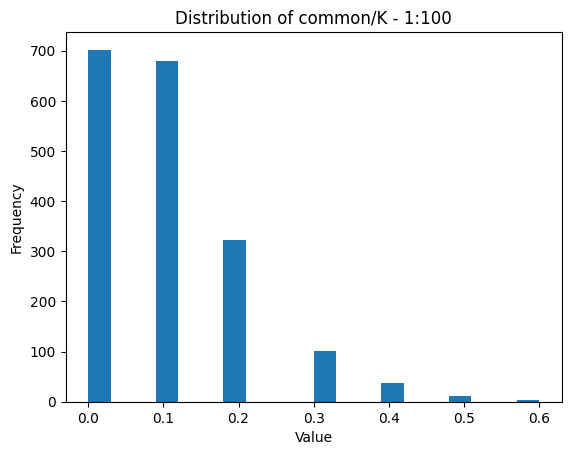

In [18]:
# Plot a histogram of the values in the column
plt.hist(df_no_ns['common_len/K'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of common/K - 1:100')
plt.show()

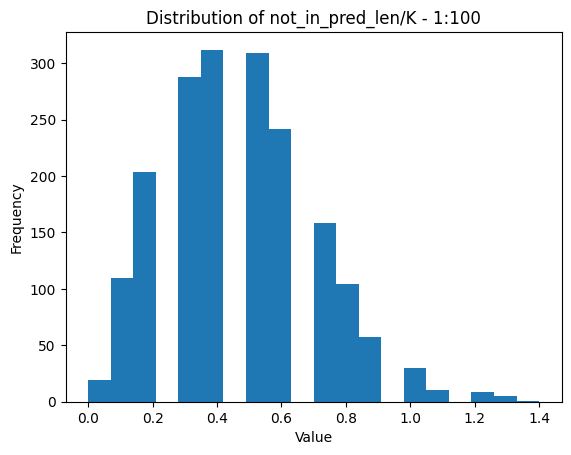

In [19]:
# Plot a histogram of the values in the column
plt.hist(df_no_ns['not_in_pred_len/K'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of not_in_pred_len/K - 1:100')
plt.show()

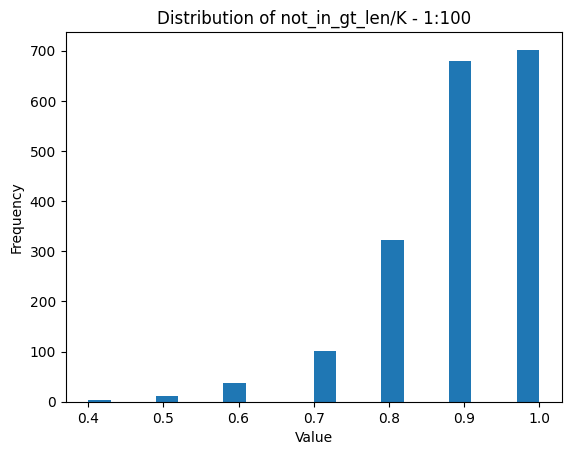

In [20]:
# Plot a histogram of the values in the column
plt.hist(df_no_ns['not_in_gt_len/K'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of not_in_gt_len/K - 1:100')
plt.show()

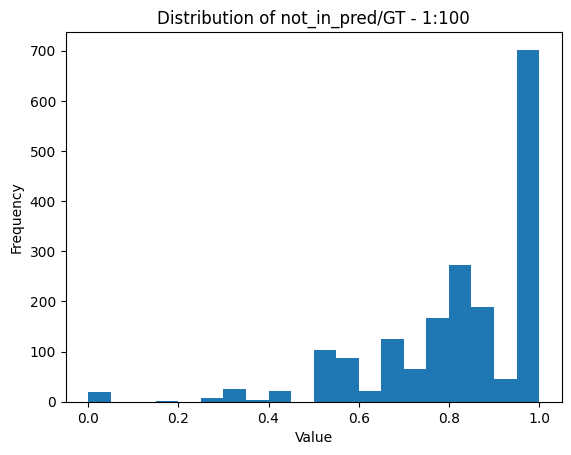

In [21]:
# Plot a histogram of the values in the column
plt.hist(df_no_ns['not_in_pred/GT'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of not_in_pred/GT - 1:100')
plt.show()

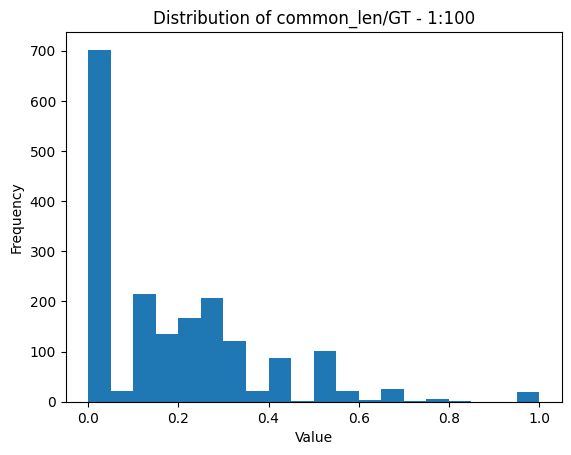

In [22]:
# Plot a histogram of the values in the column
plt.hist(df_no_ns['common_len/GT'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of common_len/GT - 1:100')
plt.show()

### Analyze on bipartite graph

In [ ]:
df_all = df_ns.merge(df_no_ns, how = 'inner', on = 'user')

In [50]:
import pandas as pd
import networkx as nx

# Read the CSV file into a DataFrame
df_graph = pd.read_csv('/home/ece/Desktop/Negative_Sampling/LightGCN-PyTorch/data/lastfm/all_data.csv', header=None)

# Add prefixes to the columns
df_graph[1] = 'u_' + df_graph[1].astype(str)
df_graph[2] = 'i_' + df_graph[2].astype(str)

B = nx.Graph()
B.add_nodes_from(df_graph[1], bipartite=0)
B.add_nodes_from(df_graph[2], bipartite=1)
B.add_edges_from(df_graph[[1, 2]].itertuples(index=False))

In [58]:
df_graph

0       1       2       3
0          NaN     u_0     i_1     2.0
1          0.0   u_424  i_4076   993.0
2          1.0  u_1311  i_1574   957.0
3          2.0  u_1671   i_410   146.0
4          3.0   u_997  i_1686  1417.0
...        ...     ...     ...     ...
52664  10528.0  u_1604  i_2809    78.0
52665  10529.0   u_299  i_2498  1165.0
52666  10530.0    u_22   i_575   662.0
52667  10531.0   u_915   i_275   148.0
52668  10532.0  u_1359  i_4028    26.0

[52669 rows x 4 columns]

In [51]:
print(B.nodes(data=True))
print(B.edges())

[('u_0', {'bipartite': 0}), ('u_424', {'bipartite': 0}), ('u_1311', {'bipartite': 0}), ('u_1671', {'bipartite': 0}), ('u_997', {'bipartite': 0}), ('u_1422', {'bipartite': 0}), ('u_121', {'bipartite': 0}), ('u_168', {'bipartite': 0}), ('u_574', {'bipartite': 0}), ('u_833', {'bipartite': 0}), ('u_110', {'bipartite': 0}), ('u_848', {'bipartite': 0}), ('u_86', {'bipartite': 0}), ('u_976', {'bipartite': 0}), ('u_686', {'bipartite': 0}), ('u_1660', {'bipartite': 0}), ('u_1850', {'bipartite': 0}), ('u_769', {'bipartite': 0}), ('u_116', {'bipartite': 0}), ('u_1001', {'bipartite': 0}), ('u_1768', {'bipartite': 0}), ('u_1832', {'bipartite': 0}), ('u_314', {'bipartite': 0}), ('u_1746', {'bipartite': 0}), ('u_1259', {'bipartite': 0}), ('u_275', {'bipartite': 0}), ('u_829', {'bipartite': 0}), ('u_920', {'bipartite': 0}), ('u_417', {'bipartite': 0}), ('u_107', {'bipartite': 0}), ('u_782', {'bipartite': 0}), ('u_509', {'bipartite': 0}), ('u_1489', {'bipartite': 0}), ('u_768', {'bipartite': 0}), ('u_1

In [52]:
max_degree = max(B.degree(node) for node in B.nodes if B.nodes[node]['bipartite'] == 0)

In [53]:
max_degree

46

In [54]:
max_degree = max(B.degree(node) for node in B.nodes if B.nodes[node]['bipartite'] == 1)

In [55]:
max_degree

100

In [50]:
# Remove prefixes from the nodes
#B = nx.relabel_nodes(B, lambda x: x.split('_')[1])

#print(B.nodes(data=True))
#print(B.edges())

In [25]:
#nx.bipartite.betweenness_centrality(B, nodes={'u_0'})

#### Analyze for 1:1

In [30]:
#User
ns_common__GT = list(users_to_analyze1_ns.user)
print("ns_common__GT: ", ns_common__GT)
ns_not_in_pred__GT = list(users_to_analyze2_ns.user)
print("ns_not_in_pred__GT: ", ns_not_in_pred__GT)
ns_not_in_GT__K = list(users_to_analyze3_ns.user)
print("ns_not_in_GT__K: ", ns_not_in_GT__K)


ns_common__GT:  [1319, 730, 1781, 415, 117, 1314, 826, 604, 641, 823]
ns_not_in_pred__GT:  [1194, 704, 1890, 893, 1024, 681, 169, 1857, 676, 613]
ns_not_in_GT__K:  [704, 970, 1368, 1578, 72, 1250, 1351, 1857, 676, 1024]


In [35]:
print(".... Users that has the smallest commmon/GT values in 1:1 data .... ")
for element in ns_common__GT:
    user_id = 'u_' + str(element)
    print(f"Degree centrality for {user_id}: ", nx.bipartite.degree_centrality(B, nodes={user_id})[user_id])

print('-------------------------------------------------------------------------')
print(".... Users that has the smallest not_in_pred/GT values in 1:1 data .... ")
for element in ns_not_in_pred__GT:
    user_id = 'u_' + str(element)
    print(f"Degree centrality for {user_id}: ", nx.bipartite.degree_centrality(B, nodes={user_id})[user_id])

print('-------------------------------------------------------------------------')
print(".... Users that has the smallest not_in_GT/K values in 1:1 data .... ")
for element in ns_not_in_GT__K:
    user_id = 'u_' + str(element)
    print(f"Degree centrality for {user_id}: ", nx.bipartite.degree_centrality(B, nodes={user_id})[user_id])



.... Users that has the smallest commmon/GT values in 1:1 data .... 
Degree centrality for u_1319:  0.004082273512325325
Degree centrality for u_730:  0.004553305071439786
Degree centrality for u_1781:  0.005181347150259067
Degree centrality for u_415:  0.005495368189668707
Degree centrality for u_117:  0.004710315591144606
Degree centrality for u_1314:  0.002983199874391584
Degree centrality for u_826:  0.0032972209138012244
Degree centrality for u_604:  0.004239284032030145
Degree centrality for u_641:  0.002198147275867483
Degree centrality for u_823:  0.0053383576699638875
-------------------------------------------------------------------------
.... Users that has the smallest not_in_pred/GT values in 1:1 data .... 
Degree centrality for u_1194:  0.006751452347307269
Degree centrality for u_704:  0.005966399748783168
Degree centrality for u_1890:  0.004082273512325325
Degree centrality for u_893:  0.0036112419532108647
Degree centrality for u_1024:  0.003768252472915685
Degree cen

In [41]:
list(df_ns[df_ns['user'].isin(ns_common__GT)][['user', 'pred_ns']].pred_ns)

[array([  72, 3819, 1084, 4232, 3006, 1062, 1890, 4350,   47, 3914]),
 array([1618, 3870, 1772, 3528, 2606, 2034,  937, 3889,    0, 3598]),
 array([  25, 4347, 1242, 3070,  407, 2461, 1866,  869, 1702,  807]),
 array([ 990,  397, 2861, 4091, 2389,  965, 3268, 2842, 4024, 3239]),
 array([2010, 2197, 4213, 2579, 2455,  537, 2380, 3547,  550, 2782]),
 array([4357, 3971, 1883, 3768, 4015, 3887, 2025, 1854,  916, 3250]),
 array([3487, 2282,  514,  255,  456, 2388, 1409,  757, 2023, 2913]),
 array([3535, 2760,  617, 2644, 4232, 1298, 2319, 1522, 2592, 1535]),
 array([3361,   52, 1245, 2854, 4262, 4076, 4366, 1502,  298, 4371]),
 array([2427,  162,  343, 2884, 3211, 3729,  932, 3802,  657, 1819])]

In [42]:
list(df_ns[df_ns['user'].isin(ns_not_in_pred__GT)][['user', 'pred_ns']].pred_ns)

[array([ 514, 2051, 2943, 1744, 4014, 2776, 3635,  660,  582, 2300]),
 array([3142, 1977, 2620,   62, 3320, 4171, 1109,  907,  123, 4424]),
 array([ 317, 1471, 3069, 4004, 3385, 2680, 2648, 2205, 1257, 3975]),
 array([2697,  786, 1914, 1560,  837, 1174, 1910, 2108, 1965, 1458]),
 array([ 334,  642, 4407, 4152, 3229, 4353, 3341, 3982, 1238, 3773]),
 array([4393,  878, 2280,  669, 3706, 2033, 1324, 4325, 4317, 1410]),
 array([ 770, 1801,  544, 1355, 2535, 3572, 1966, 1197, 1519, 1375]),
 array([3649, 4048, 1394, 2778, 3936, 2742, 3014, 1208, 4122, 2665]),
 array([1814, 1736, 3021, 2180, 2020, 3876,  749,   40,  732, 1437]),
 array([1674, 4347,  834, 2463, 3906, 3086, 4098, 3435, 2583, 1649])]

In [43]:
list(df_ns[df_ns['user'].isin(ns_not_in_GT__K)][['user', 'pred_ns']].pred_ns)

[array([3819,   25,  530, 4304, 1297, 2889, 2355,  707, 1079,   29]),
 array([2303, 2763, 1366, 4043, 3650, 1014, 3412, 3541, 2975,  103]),
 array([4260, 4317, 1948,  254, 2345, 3155, 2897, 3933, 3249, 3984]),
 array([ 454, 3835, 1087, 3306, 2806, 1270, 3625, 1447, 1895, 1099]),
 array([2455, 3620, 4347, 3841, 4059,  695, 2689, 2936, 3498,  441]),
 array([2062, 1517, 3295,  651, 2707, 1804,  202, 3943, 3863,  379]),
 array([ 514, 2051, 2943, 1744, 4014, 2776, 3635,  660,  582, 2300]),
 array([3142, 1977, 2620,   62, 3320, 4171, 1109,  907,  123, 4424]),
 array([ 317, 1471, 3069, 4004, 3385, 2680, 2648, 2205, 1257, 3975]),
 array([4393,  878, 2280,  669, 3706, 2033, 1324, 4325, 4317, 1410])]

In [21]:
# En cok gorunen yakalanamayan item'lar (not in pred)
list(sorted_freq_dict_fn.keys())[:10]

[319, 731, 437, 298, 324, 828, 323, 167, 582, 337]

In [44]:
users_to_analyze1_1_ns = df_ns.nlargest(10, 'common_len/GT')[['user', 'common_len/GT']]
# common item cogunlukla sifir oldugu icin coomon_len/GT de cogunlukla sifir. -- Analiz edilecek cok kisi var 
users_to_analyze2_1_ns = df_ns.nlargest(10, 'not_in_pred/GT')[['user', 'not_in_pred/GT']]

users_to_analyze3_1_ns = df_ns.nlargest(10, 'not_in_gt_len/K')[['user', 'not_in_gt_len/K']]


In [46]:
#User
largest_ns_common__GT = list(users_to_analyze1_1_ns.user)
print("ns_common__GT: ",largest_ns_common__GT)
largest_ns_not_in_pred__GT = list(users_to_analyze2_1_ns.user)
print("ns_not_in_pred__GT: ", largest_ns_not_in_pred__GT)
largest_ns_not_in_GT__K = list(users_to_analyze3_ns.user)
print("ns_not_in_GT__K: ", largest_ns_not_in_GT__K)


ns_common__GT:  [1194, 704, 1890, 893, 1024, 681, 169, 1857, 676, 613]
ns_not_in_pred__GT:  [1319, 730, 1781, 415, 117, 1314, 826, 604, 641, 823]
ns_not_in_GT__K:  [704, 970, 1368, 1578, 72, 1250, 1351, 1857, 676, 1024]


In [48]:
print(".... Users that has the largest commmon/GT values in 1:1 data .... ")
for element in largest_ns_common__GT:
    user_id = 'u_' + str(element)
    print(f"Degree centrality for {user_id}: ", nx.bipartite.degree_centrality(B, nodes={user_id})[user_id])

print('-------------------------------------------------------------------------')
print(".... Users that has the largest not_in_pred/GT values in 1:1 data .... ")
for element in largest_ns_not_in_pred__GT:
    user_id = 'u_' + str(element)
    print(f"Degree centrality for {user_id}: ", nx.bipartite.degree_centrality(B, nodes={user_id})[user_id])

print('-------------------------------------------------------------------------')
print(".... Users that has the largest not_in_GT/K values in 1:1 data .... ")
for element in largest_ns_not_in_GT__K:
    user_id = 'u_' + str(element)
    print(f"Degree centrality for {user_id}: ", nx.bipartite.degree_centrality(B, nodes={user_id})[user_id])



.... Users that has the largest commmon/GT values in 1:1 data .... 
Degree centrality for u_1194:  0.006751452347307269
Degree centrality for u_704:  0.005966399748783168
Degree centrality for u_1890:  0.004082273512325325
Degree centrality for u_893:  0.0036112419532108647
Degree centrality for u_1024:  0.003768252472915685
Degree centrality for u_681:  0.004396294551734966
Degree centrality for u_169:  0.006123410268487988
Degree centrality for u_1857:  0.0032972209138012244
Degree centrality for u_676:  0.0025121683152771234
Degree centrality for u_613:  0.0026691788349819437
-------------------------------------------------------------------------
.... Users that has the largest not_in_pred/GT values in 1:1 data .... 
Degree centrality for u_1319:  0.004082273512325325
Degree centrality for u_730:  0.004553305071439786
Degree centrality for u_1781:  0.005181347150259067
Degree centrality for u_415:  0.005495368189668707
Degree centrality for u_117:  0.004710315591144606
Degree cent

In [49]:
list(df_ns[df_ns['user'].isin(largest_ns_common__GT)][['user', 'pred_ns']].pred_ns)

[array([ 514, 2051, 2943, 1744, 4014, 2776, 3635,  660,  582, 2300]),
 array([3142, 1977, 2620,   62, 3320, 4171, 1109,  907,  123, 4424]),
 array([ 317, 1471, 3069, 4004, 3385, 2680, 2648, 2205, 1257, 3975]),
 array([2697,  786, 1914, 1560,  837, 1174, 1910, 2108, 1965, 1458]),
 array([ 334,  642, 4407, 4152, 3229, 4353, 3341, 3982, 1238, 3773]),
 array([4393,  878, 2280,  669, 3706, 2033, 1324, 4325, 4317, 1410]),
 array([ 770, 1801,  544, 1355, 2535, 3572, 1966, 1197, 1519, 1375]),
 array([3649, 4048, 1394, 2778, 3936, 2742, 3014, 1208, 4122, 2665]),
 array([1814, 1736, 3021, 2180, 2020, 3876,  749,   40,  732, 1437]),
 array([1674, 4347,  834, 2463, 3906, 3086, 4098, 3435, 2583, 1649])]

In [50]:
list(df_ns[df_ns['user'].isin(largest_ns_not_in_pred__GT)][['user', 'pred_ns']].pred_ns)

[array([  72, 3819, 1084, 4232, 3006, 1062, 1890, 4350,   47, 3914]),
 array([1618, 3870, 1772, 3528, 2606, 2034,  937, 3889,    0, 3598]),
 array([  25, 4347, 1242, 3070,  407, 2461, 1866,  869, 1702,  807]),
 array([ 990,  397, 2861, 4091, 2389,  965, 3268, 2842, 4024, 3239]),
 array([2010, 2197, 4213, 2579, 2455,  537, 2380, 3547,  550, 2782]),
 array([4357, 3971, 1883, 3768, 4015, 3887, 2025, 1854,  916, 3250]),
 array([3487, 2282,  514,  255,  456, 2388, 1409,  757, 2023, 2913]),
 array([3535, 2760,  617, 2644, 4232, 1298, 2319, 1522, 2592, 1535]),
 array([3361,   52, 1245, 2854, 4262, 4076, 4366, 1502,  298, 4371]),
 array([2427,  162,  343, 2884, 3211, 3729,  932, 3802,  657, 1819])]

In [51]:
list(df_ns[df_ns['user'].isin(largest_ns_not_in_GT__K)][['user', 'pred_ns']].pred_ns)

[array([3819,   25,  530, 4304, 1297, 2889, 2355,  707, 1079,   29]),
 array([2303, 2763, 1366, 4043, 3650, 1014, 3412, 3541, 2975,  103]),
 array([4260, 4317, 1948,  254, 2345, 3155, 2897, 3933, 3249, 3984]),
 array([ 454, 3835, 1087, 3306, 2806, 1270, 3625, 1447, 1895, 1099]),
 array([2455, 3620, 4347, 3841, 4059,  695, 2689, 2936, 3498,  441]),
 array([2062, 1517, 3295,  651, 2707, 1804,  202, 3943, 3863,  379]),
 array([ 514, 2051, 2943, 1744, 4014, 2776, 3635,  660,  582, 2300]),
 array([3142, 1977, 2620,   62, 3320, 4171, 1109,  907,  123, 4424]),
 array([ 317, 1471, 3069, 4004, 3385, 2680, 2648, 2205, 1257, 3975]),
 array([4393,  878, 2280,  669, 3706, 2033, 1324, 4325, 4317, 1410])]

In [25]:
print("Analyze for item 319")
print("degree centrality: ", nx.bipartite.degree_centrality(B, nodes={'i_319'}))
print('Node redundancy: ', nx.bipartite.node_redundancy(B, ['i_319']))

print("Analyze for item 731")
print("degree centrality: ", nx.bipartite.degree_centrality(B, nodes={'i_731'}))
print('Node redundancy: ', nx.bipartite.node_redundancy(B, ['i_731']))

print("Analyze for item 437")
print("degree centrality: ", nx.bipartite.degree_centrality(B, nodes={'i_437'}))
print('Node redundancy: ', nx.bipartite.node_redundancy(B, ['i_437']))

print("Analyze for item 298")
print("degree centrality: ", nx.bipartite.degree_centrality(B, nodes={'i_298'}))
print('Node redundancy: ', nx.bipartite.node_redundancy(B, ['i_298']))

print("Analyze for item 324")
print("degree centrality: ", nx.bipartite.degree_centrality(B, nodes={'i_324'}))
print('Node redundancy: ', nx.bipartite.node_redundancy(B, ['i_324']))

print("Analyze for item 828")
print("degree centrality: ", nx.bipartite.degree_centrality(B, nodes={'i_828'}))
print('Node redundancy: ', nx.bipartite.node_redundancy(B, ['i_828']))

print("Analyze for item 323")
print("degree centrality: ", nx.bipartite.degree_centrality(B, nodes={'i_323'}))
print('Node redundancy: ', nx.bipartite.node_redundancy(B, ['i_323']))

print("Analyze for item 167")
print("degree centrality: ", nx.bipartite.degree_centrality(B, nodes={'i_167'}))
print('Node redundancy: ', nx.bipartite.node_redundancy(B, ['i_167']))

print("Analyze for item 582")
print("degree centrality: ", nx.bipartite.degree_centrality(B, nodes={'i_582'}))
print('Node redundancy: ', nx.bipartite.node_redundancy(B, ['i_582']))

print("Analyze for item 337")
print("degree centrality: ", nx.bipartite.degree_centrality(B, nodes={'i_337'}))
print('Node redundancy: ', nx.bipartite.node_redundancy(B, ['i_337']))

Analyze for item 319
degree centrality:  {'i_319': 0.003925262992620505, 'i_2309': 3.0, 'i_1251': 10.0, 'i_4270': 3.0, 'i_1528': 4.0, 'i_657': 5.0, 'u_1430': 31.0, 'u_1099': 37.0, 'u_1207': 30.0, 'i_3286': 5.0, 'i_1577': 13.0, 'u_461': 28.0, 'i_1986': 3.0, 'u_1037': 28.0, 'i_1862': 7.0, 'u_364': 21.0, 'i_3236': 8.0, 'i_760': 3.0, 'i_3591': 6.0, 'i_714': 5.0, 'i_131': 22.0, 'i_272': 95.0, 'i_1388': 4.0, 'i_2651': 3.0, 'i_2704': 6.0, 'i_2748': 9.0, 'i_2858': 4.0, 'i_4163': 3.0, 'i_2714': 5.0, 'u_195': 32.0, 'u_538': 21.0, 'i_3850': 4.0, 'u_349': 36.0, 'i_3136': 3.0, 'i_4138': 4.0, 'u_650': 38.0, 'i_937': 10.0, 'i_210': 37.0, 'i_1292': 25.0, 'i_4245': 3.0, 'i_2209': 8.0, 'u_31': 37.0, 'i_2367': 13.0, 'i_1452': 3.0, 'i_2098': 5.0, 'i_3729': 3.0, 'u_279': 35.0, 'u_576': 29.0, 'i_2875': 4.0, 'i_189': 62.0, 'i_63': 16.0, 'i_1560': 9.0, 'i_4002': 4.0, 'i_4351': 3.0, 'i_504': 3.0, 'u_1686': 33.0, 'i_1372': 4.0, 'i_1077': 5.0, 'i_2759': 10.0, 'u_1239': 12.0, 'i_599': 33.0, 'i_2327': 8.0, 'i_2332

In [26]:
# en cok gorunen ve yanlis detect edilen itemlar (not in gt)
list(sorted_freq_dict_fp.keys())[:10]

[3887, 4393, 4353, 4347, 749, 4389, 4335, 965, 666, 4091]

In [27]:
print("Analyze for item 3887")
print("degree centrality: ", nx.bipartite.degree_centrality(B, nodes={'i_3887'}))
print('Node redundancy: ', nx.bipartite.node_redundancy(B, ['i_3887']))

print("Analyze for item 4393")
print("degree centrality: ", nx.bipartite.degree_centrality(B, nodes={'i_4393'}))
print('Node redundancy: ', nx.bipartite.node_redundancy(B, ['i_4393']))

print("Analyze for item 4353")
print("degree centrality: ", nx.bipartite.degree_centrality(B, nodes={'i_4353'}))
print('Node redundancy: ', nx.bipartite.node_redundancy(B, ['i_4353']))

print("Analyze for item 4347")
print("degree centrality: ", nx.bipartite.degree_centrality(B, nodes={'i_4347'}))
print('Node redundancy: ', nx.bipartite.node_redundancy(B, ['i_4347']))

print("Analyze for item 749")
print("degree centrality: ", nx.bipartite.degree_centrality(B, nodes={'i_749'}))
print('Node redundancy: ', nx.bipartite.node_redundancy(B, ['i_749']))

print("Analyze for item 4389")
print("degree centrality: ", nx.bipartite.degree_centrality(B, nodes={'i_4389'}))
print('Node redundancy: ', nx.bipartite.node_redundancy(B, ['i_4389']))

print("Analyze for item 4335")
print("degree centrality: ", nx.bipartite.degree_centrality(B, nodes={'i_4335'}))
print('Node redundancy: ', nx.bipartite.node_redundancy(B, ['i_323']))

print("Analyze for item 965")
print("degree centrality: ", nx.bipartite.degree_centrality(B, nodes={'i_965'}))
print('Node redundancy: ', nx.bipartite.node_redundancy(B, ['i_965']))

print("Analyze for item 666")
print("degree centrality: ", nx.bipartite.degree_centrality(B, nodes={'i_666'}))
print('Node redundancy: ', nx.bipartite.node_redundancy(B, ['i_666']))

print("Analyze for item 4091")
print("degree centrality: ", nx.bipartite.degree_centrality(B, nodes={'i_4091'}))
print('Node redundancy: ', nx.bipartite.node_redundancy(B, ['i_4091']))

Analyze for item 3887
degree centrality:  {'i_3887': 0.000785052598524101, 'i_2309': 3.0, 'i_1251': 10.0, 'i_4270': 3.0, 'i_1528': 4.0, 'i_657': 5.0, 'u_1430': 31.0, 'u_1099': 37.0, 'u_1207': 30.0, 'i_3286': 5.0, 'i_1577': 13.0, 'u_461': 28.0, 'i_1986': 3.0, 'u_1037': 28.0, 'i_1862': 7.0, 'u_364': 21.0, 'i_3236': 8.0, 'i_760': 3.0, 'i_3591': 6.0, 'i_714': 5.0, 'i_131': 22.0, 'i_272': 95.0, 'i_1388': 4.0, 'i_2651': 3.0, 'i_2704': 6.0, 'i_2748': 9.0, 'i_2858': 4.0, 'i_4163': 3.0, 'i_2714': 5.0, 'u_195': 32.0, 'u_538': 21.0, 'i_3850': 4.0, 'u_349': 36.0, 'i_3136': 3.0, 'i_4138': 4.0, 'u_650': 38.0, 'i_937': 10.0, 'i_210': 37.0, 'i_1292': 25.0, 'i_4245': 3.0, 'i_2209': 8.0, 'u_31': 37.0, 'i_2367': 13.0, 'i_1452': 3.0, 'i_2098': 5.0, 'i_3729': 3.0, 'u_279': 35.0, 'u_576': 29.0, 'i_2875': 4.0, 'i_189': 62.0, 'i_63': 16.0, 'i_1560': 9.0, 'i_4002': 4.0, 'i_4351': 3.0, 'i_504': 3.0, 'u_1686': 33.0, 'i_1372': 4.0, 'i_1077': 5.0, 'i_2759': 10.0, 'u_1239': 12.0, 'i_599': 33.0, 'i_2327': 8.0, 'i_23

#### Analze for 1:100

In [65]:
users_to_analyze1_no_ns = df_no_ns.nsmallest(10, 'common_len/GT')[['user', 'common_len/GT']]
# common item cogunlukla sifir oldugu icin coomon_len/GT de cogunlukla sifir. -- Analiz edilecek cok kisi var 

users_to_analyze2_no_ns = df_no_ns.nsmallest(10, 'not_in_pred/GT')[['user', 'not_in_pred/GT']]

users_to_analyze3_no_ns = df_no_ns.nsmallest(10, 'not_in_gt_len/K')[['user', 'not_in_gt_len/K']]


In [66]:
#User
no_ns_common__GT = list(users_to_analyze1_no_ns.user)
print("ns_common__GT: ", no_ns_common__GT)
no_ns_not_in_pred__GT = list(users_to_analyze1_no_ns.user)
print("ns_not_in_pred__GT: ", no_ns_not_in_pred__GT)
no_ns_not_in_GT__K = list(users_to_analyze1_no_ns.user)
print("ns_not_in_GT__K: ", no_ns_not_in_GT__K)


ns_common__GT:  [1319, 117, 970, 641, 101, 1224, 1302, 765, 625, 1606]
ns_not_in_pred__GT:  [1319, 117, 970, 641, 101, 1224, 1302, 765, 625, 1606]
ns_not_in_GT__K:  [1319, 117, 970, 641, 101, 1224, 1302, 765, 625, 1606]


In [67]:
print(".... Users that has the smallest commmon/GT values in 1:1 data .... ")
for element in no_ns_common__GT:
    user_id = 'u_' + str(element)
    print(f"Degree centrality for {user_id}: ", nx.bipartite.degree_centrality(B, nodes={user_id})[user_id])

print('-------------------------------------------------------------------------')
print(".... Users that has the smallest not_in_pred/GT values in 1:1 data .... ")
for element in no_ns_not_in_pred__GT:
    user_id = 'u_' + str(element)
    print(f"Degree centrality for {user_id}: ", nx.bipartite.degree_centrality(B, nodes={user_id})[user_id])

print('-------------------------------------------------------------------------')
print(".... Users that has the smallest not_in_GT/K values in 1:1 data .... ")
for element in no_ns_not_in_GT__K:
    user_id = 'u_' + str(element)
    print(f"Degree centrality for {user_id}: ", nx.bipartite.degree_centrality(B, nodes={user_id})[user_id])



.... Users that has the smallest commmon/GT values in 1:1 data .... 
Degree centrality for u_1319:  0.004082273512325325
Degree centrality for u_117:  0.004710315591144606
Degree centrality for u_970:  0.004082273512325325
Degree centrality for u_641:  0.002198147275867483
Degree centrality for u_101:  0.005652378709373527
Degree centrality for u_1224:  0.004239284032030145
Degree centrality for u_1302:  0.003925262992620505
Degree centrality for u_765:  0.005966399748783168
Degree centrality for u_625:  0.005809389229078348
Degree centrality for u_1606:  0.0034542314335060447
-------------------------------------------------------------------------
.... Users that has the smallest not_in_pred/GT values in 1:1 data .... 
Degree centrality for u_1319:  0.004082273512325325
Degree centrality for u_117:  0.004710315591144606
Degree centrality for u_970:  0.004082273512325325
Degree centrality for u_641:  0.002198147275867483
Degree centrality for u_101:  0.005652378709373527
Degree centra

In [70]:
list(df_no_ns[df_no_ns['user'].isin(no_ns_common__GT)][['user', 'pred_no_ns']].pred_no_ns)

[array([1489,  617,  770,  553,  245,  544, 3493, 1156,   41,  937]),
 array([ 735,  364,  545, 3807, 1596,  350,  927, 3051,  737, 1154]),
 array([ 319, 2110,  733, 1306,  460,  629,  823,  540,  933,  745]),
 array([ 672,  489,  976,  151,  959,  730,  274, 1977,  673,  271]),
 array([ 823,  372,  914,  620,  718,  475,  118, 2832, 1727, 1800]),
 array([1306,  744,  102,  484, 1718,  532,  794, 1434, 1025,  511]),
 array([723, 343, 823, 937, 543, 248, 993, 430, 329, 438]),
 array([ 381,  826, 1067, 1634,  348,  437, 2632,  258,  995,  251]),
 array([ 899, 1526, 2342,  682,  828, 2475, 3239,  436, 1219, 1449]),
 array([ 532,  593, 2535,  616, 1345,  102, 2114,  312, 3803, 1879])]

In [71]:
list(df_no_ns[df_no_ns['user'].isin(no_ns_not_in_pred__GT)][['user', 'pred_no_ns']].pred_no_ns)

[array([1489,  617,  770,  553,  245,  544, 3493, 1156,   41,  937]),
 array([ 735,  364,  545, 3807, 1596,  350,  927, 3051,  737, 1154]),
 array([ 319, 2110,  733, 1306,  460,  629,  823,  540,  933,  745]),
 array([ 672,  489,  976,  151,  959,  730,  274, 1977,  673,  271]),
 array([ 823,  372,  914,  620,  718,  475,  118, 2832, 1727, 1800]),
 array([1306,  744,  102,  484, 1718,  532,  794, 1434, 1025,  511]),
 array([723, 343, 823, 937, 543, 248, 993, 430, 329, 438]),
 array([ 381,  826, 1067, 1634,  348,  437, 2632,  258,  995,  251]),
 array([ 899, 1526, 2342,  682,  828, 2475, 3239,  436, 1219, 1449]),
 array([ 532,  593, 2535,  616, 1345,  102, 2114,  312, 3803, 1879])]

In [72]:
list(df_no_ns[df_no_ns['user'].isin(no_ns_not_in_GT__K)][['user', 'pred_no_ns']].pred_no_ns)

[array([1489,  617,  770,  553,  245,  544, 3493, 1156,   41,  937]),
 array([ 735,  364,  545, 3807, 1596,  350,  927, 3051,  737, 1154]),
 array([ 319, 2110,  733, 1306,  460,  629,  823,  540,  933,  745]),
 array([ 672,  489,  976,  151,  959,  730,  274, 1977,  673,  271]),
 array([ 823,  372,  914,  620,  718,  475,  118, 2832, 1727, 1800]),
 array([1306,  744,  102,  484, 1718,  532,  794, 1434, 1025,  511]),
 array([723, 343, 823, 937, 543, 248, 993, 430, 329, 438]),
 array([ 381,  826, 1067, 1634,  348,  437, 2632,  258,  995,  251]),
 array([ 899, 1526, 2342,  682,  828, 2475, 3239,  436, 1219, 1449]),
 array([ 532,  593, 2535,  616, 1345,  102, 2114,  312, 3803, 1879])]

In [75]:
users_to_analyze1_1_no_ns = df_no_ns.nlargest(10, 'common_len/GT')[['user', 'common_len/GT']]
# common item cogunlukla sifir oldugu icin coomon_len/GT de cogunlukla sifir. -- Analiz edilecek cok kisi var 
users_to_analyze2_1_no_ns = df_no_ns.nlargest(10, 'not_in_pred/GT')[['user', 'not_in_pred/GT']]

users_to_analyze3_1_no_ns = df_no_ns.nlargest(10, 'not_in_gt_len/K')[['user', 'not_in_gt_len/K']]


In [76]:
#User
largest_no_ns_common__GT = list(users_to_analyze1_1_no_ns.user)
print("ns_common__GT: ",largest_ns_common__GT)
largest_no_ns_not_in_pred__GT = list(users_to_analyze2_1_no_ns.user)
print("ns_not_in_pred__GT: ", largest_ns_not_in_pred__GT)
largest_no_ns_not_in_GT__K = list(users_to_analyze3_1_no_ns.user)
print("ns_not_in_GT__K: ", largest_ns_not_in_GT__K)


ns_common__GT:  [1194, 704, 1890, 893, 1024, 681, 169, 1857, 676, 613]
ns_not_in_pred__GT:  [1319, 730, 1781, 415, 117, 1314, 826, 604, 641, 823]
ns_not_in_GT__K:  [704, 970, 1368, 1578, 72, 1250, 1351, 1857, 676, 1024]


In [77]:
print(".... Users that has the largest commmon/GT values in 1:1 data .... ")
for element in largest_no_ns_common__GT:
    user_id = 'u_' + str(element)
    print(f"Degree centrality for {user_id}: ", nx.bipartite.degree_centrality(B, nodes={user_id})[user_id])

print('-------------------------------------------------------------------------')
print(".... Users that has the largest not_in_pred/GT values in 1:1 data .... ")
for element in largest_no_ns_not_in_pred__GT:
    user_id = 'u_' + str(element)
    print(f"Degree centrality for {user_id}: ", nx.bipartite.degree_centrality(B, nodes={user_id})[user_id])

print('-------------------------------------------------------------------------')
print(".... Users that has the largest not_in_GT/K values in 1:1 data .... ")
for element in largest_no_ns_not_in_GT__K:
    user_id = 'u_' + str(element)
    print(f"Degree centrality for {user_id}: ", nx.bipartite.degree_centrality(B, nodes={user_id})[user_id])



.... Users that has the largest commmon/GT values in 1:1 data .... 
Degree centrality for u_1554:  0.003140210394096404
Degree centrality for u_1406:  0.005495368189668707
Degree centrality for u_1538:  0.005024336630554247
Degree centrality for u_749:  0.003925262992620505
Degree centrality for u_1511:  0.0032972209138012244
Degree centrality for u_687:  0.004082273512325325
Degree centrality for u_446:  0.004396294551734966
Degree centrality for u_1106:  0.003925262992620505
Degree centrality for u_652:  0.006280420788192808
Degree centrality for u_1890:  0.004082273512325325
-------------------------------------------------------------------------
.... Users that has the largest not_in_pred/GT values in 1:1 data .... 
Degree centrality for u_1319:  0.004082273512325325
Degree centrality for u_117:  0.004710315591144606
Degree centrality for u_970:  0.004082273512325325
Degree centrality for u_641:  0.002198147275867483
Degree centrality for u_101:  0.005652378709373527
Degree centra

In [78]:
list(df_no_ns[df_no_ns['user'].isin(largest_no_ns_common__GT)][['user', 'pred_no_ns']].pred_no_ns)

[array([ 737,  460,  371, 1154, 3387,  270,  933, 3492, 3021,  261]),
 array([ 813,  460, 1741, 1740,  481, 1282, 1299, 1447, 1735, 1731]),
 array([ 271,  649,  581,   82, 2101,  171,  176, 3644,  582,  232]),
 array([1393, 2857, 3031,  225, 1406, 1269,  212, 1268, 1334, 2861]),
 array([ 417,  796,  823,  338,  685,  798,  684,  722, 2529,  780]),
 array([1069, 1450, 1477, 1473, 3348, 3350, 1226, 1479, 3649, 3349]),
 array([ 673, 1628,  335,  676,  587,  296,  827,  901,  341,  334]),
 array([4397, 2391, 4029, 1117,  698,  266,  701,    1,   52, 2554]),
 array([ 295, 2644,  676,  181,  420,  344,  180,  271,  272, 1888]),
 array([1280, 1682, 1726, 1208,   71,  370, 1299, 1130,  382,  813])]

In [79]:
list(df_no_ns[df_no_ns['user'].isin(largest_no_ns_not_in_pred__GT)][['user', 'pred_no_ns']].pred_no_ns)

[array([1489,  617,  770,  553,  245,  544, 3493, 1156,   41,  937]),
 array([ 735,  364,  545, 3807, 1596,  350,  927, 3051,  737, 1154]),
 array([ 319, 2110,  733, 1306,  460,  629,  823,  540,  933,  745]),
 array([ 672,  489,  976,  151,  959,  730,  274, 1977,  673,  271]),
 array([ 823,  372,  914,  620,  718,  475,  118, 2832, 1727, 1800]),
 array([1306,  744,  102,  484, 1718,  532,  794, 1434, 1025,  511]),
 array([723, 343, 823, 937, 543, 248, 993, 430, 329, 438]),
 array([ 381,  826, 1067, 1634,  348,  437, 2632,  258,  995,  251]),
 array([ 899, 1526, 2342,  682,  828, 2475, 3239,  436, 1219, 1449]),
 array([ 532,  593, 2535,  616, 1345,  102, 2114,  312, 3803, 1879])]

In [80]:
list(df_no_ns[df_no_ns['user'].isin(largest_no_ns_not_in_GT__K)][['user', 'pred_no_ns']].pred_no_ns)

[array([1489,  617,  770,  553,  245,  544, 3493, 1156,   41,  937]),
 array([ 735,  364,  545, 3807, 1596,  350,  927, 3051,  737, 1154]),
 array([ 319, 2110,  733, 1306,  460,  629,  823,  540,  933,  745]),
 array([ 672,  489,  976,  151,  959,  730,  274, 1977,  673,  271]),
 array([ 823,  372,  914,  620,  718,  475,  118, 2832, 1727, 1800]),
 array([1306,  744,  102,  484, 1718,  532,  794, 1434, 1025,  511]),
 array([723, 343, 823, 937, 543, 248, 993, 430, 329, 438]),
 array([ 381,  826, 1067, 1634,  348,  437, 2632,  258,  995,  251]),
 array([ 899, 1526, 2342,  682,  828, 2475, 3239,  436, 1219, 1449]),
 array([ 532,  593, 2535,  616, 1345,  102, 2114,  312, 3803, 1879])]

In [89]:
# En cok gorunen yakalanamayan item'lar (not in pred)

no_ns_freq_dict_fn = Counter(item for sublist in df_no_ns['not_in_pred'] for item in sublist)
no_ns_sorted_freq_dict_fn = dict(sorted(no_ns_freq_dict_fn.items(), key=lambda x: x[1], reverse=True))

In [90]:
list(no_ns_sorted_freq_dict_fn.keys())[:10]

[731, 319, 437, 753, 323, 82, 828, 167, 337, 98]

In [91]:
# en cok gorunen ve yanlis detect edilen itemlar (not in gt)
no_ns_freq_dict_fp = Counter(item for sublist in df_no_ns['not_in_gt'] for item in sublist)
no_ns_sorted_freq_dict_fp = dict(sorted(no_ns_freq_dict_fp.items(), key=lambda x: x[1], reverse=True))

In [92]:
list(no_ns_sorted_freq_dict_fn.keys())[:10]

[731, 319, 437, 753, 323, 82, 828, 167, 337, 98]

In [47]:
no_ns_freq_dict_fn = Counter(item for sublist in df_ns['not_in_pred'] for item in sublist)
no_ns_sorted_freq_dict_fn = dict(sorted(no_ns_freq_dict_fn.items(), key=lambda x: x[1], reverse=True))

In [48]:
no_ns_sorted_freq_dict_fn

{319: 28,
 731: 26,
 437: 24,
 298: 24,
 324: 24,
 828: 23,
 323: 23,
 167: 22,
 582: 22,
 337: 22,
 899: 22,
 164: 21,
 753: 21,
 274: 21,
 1522: 20,
 312: 20,
 543: 20,
 334: 19,
 82: 19,
 512: 19,
 923: 19,
 420: 19,
 1921: 19,
 341: 19,
 460: 18,
 271: 18,
 181: 18,
 545: 18,
 482: 18,
 151: 18,
 98: 18,
 744: 18,
 587: 18,
 1056: 18,
 624: 17,
 610: 17,
 176: 17,
 784: 17,
 685: 17,
 118: 17,
 975: 17,
 84: 17,
 370: 17,
 1520: 17,
 415: 17,
 281: 17,
 570: 16,
 90: 16,
 49: 16,
 257: 16,
 723: 16,
 630: 16,
 329: 16,
 109: 16,
 343: 16,
 890: 16,
 348: 16,
 827: 16,
 430: 16,
 440: 16,
 285: 16,
 676: 16,
 104: 15,
 444: 15,
 540: 15,
 102: 15,
 182: 15,
 673: 15,
 532: 15,
 910: 15,
 384: 15,
 966: 15,
 204: 15,
 1385: 15,
 419: 15,
 672: 15,
 896: 15,
 41: 15,
 823: 15,
 1340: 15,
 682: 15,
 184: 15,
 292: 15,
 116: 15,
 734: 15,
 345: 15,
 67: 14,
 1306: 14,
 1182: 14,
 962: 14,
 1040: 14,
 402: 14,
 230: 14,
 448: 14,
 504: 14,
 1117: 14,
 313: 14,
 581: 14,
 201: 14,
 251: 1